In [1]:
import torch
import numpy as np
import cv2
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler

# Load and preprocess images
def load_images():
    loaded_images = []
    list_of_gestures = ['blank', 'ok', 'thumbsup', 'thumbsdown', 'fist', 'five']
    outputVectors = []
    
    # Use the correct data path
    data_path = "/home/npp-vlm/Dipan EXP/ADataMining/experiment_den_old/data"
    
    for path_idx, gesture in enumerate(list_of_gestures):
        gesture_path = os.path.join(data_path, gesture, '*')
        gest_path = glob.glob(gesture_path)
        print(f"{gesture}: {len(gest_path)} files")
        
        k = 0
        for i in range(len(gest_path)):
            if k < 1600:
                try:
                    image = cv2.imread(gest_path[i])
                    if image is None:
                        continue
                        
                    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                    gray_image = cv2.resize(gray_image, [100, 120])
                    loaded_images.append(gray_image)
                    
                    # One-hot encoding
                    one_hot = [0] * 6
                    one_hot[path_idx] = 1
                    outputVectors.append(one_hot)
                    
                    k += 1
                except Exception as e:
                    print(f"Error with {gest_path[i]}: {e}")
    
    print(f"Total images loaded: {len(loaded_images)}")
    
    if len(loaded_images) == 0:
        raise ValueError("No images were loaded. Check your file paths.")
        
    # Convert to numpy arrays
    X = np.asarray(loaded_images)
    y = np.asarray(outputVectors)
    
    # Reshape and normalize
    X = X.reshape(X.shape[0], 100, 120).astype('float32') / 255.0
    
    return X, y

# Extract HOG features from the images
def extract_hog_features(X):
    hog_features = []
    for image in X:
        fd, _ = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        hog_features.append(fd)
    return np.array(hog_features)

# Train a Random Forest or SVM model
def train_model(model_type="RF"):
    # Load data
    X, y = load_images()
    
    # Extract features using HOG
    X_hog = extract_hog_features(X)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_hog, np.argmax(y, axis=1), test_size=0.25, random_state=42)
    
    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Select model type
    if model_type == "RF":
        model = RandomForestClassifier(n_estimators=100, random_state=42)
    elif model_type == "SVM":
        model = SVC(kernel='linear', random_state=42)
    else:
        raise ValueError("Unsupported model type. Use 'RF' for Random Forest or 'SVM' for Support Vector Machine.")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    # Save the model
    if model_type == "RF":
        import joblib
        joblib.dump(model, "hand_gesture_rf_model.pkl")
    else:
        import joblib
        joblib.dump(model, "hand_gesture_svm_model.pkl")

if __name__ == "__main__":
    # Choose either 'RF' for Random Forest or 'SVM' for Support Vector Machine
    train_model(model_type="RF")  # or train_model(model_type="SVM")



blank: 1616 files
ok: 1675 files
thumbsup: 1618 files
thumbsdown: 1641 files
fist: 1752 files
five: 2019 files
Total images loaded: 9600
Test Accuracy: 0.9992
Precision: 0.9992
Recall: 0.9992
F1-Score: 0.9992


In [2]:
# graph rf

blank: 1616 files
ok: 1675 files
thumbsup: 1618 files
thumbsdown: 1641 files
fist: 1752 files
five: 2019 files
Total images loaded: 9600
Test Accuracy: 0.9992
Precision: 0.9992
Recall: 0.9992
F1-Score: 0.9992


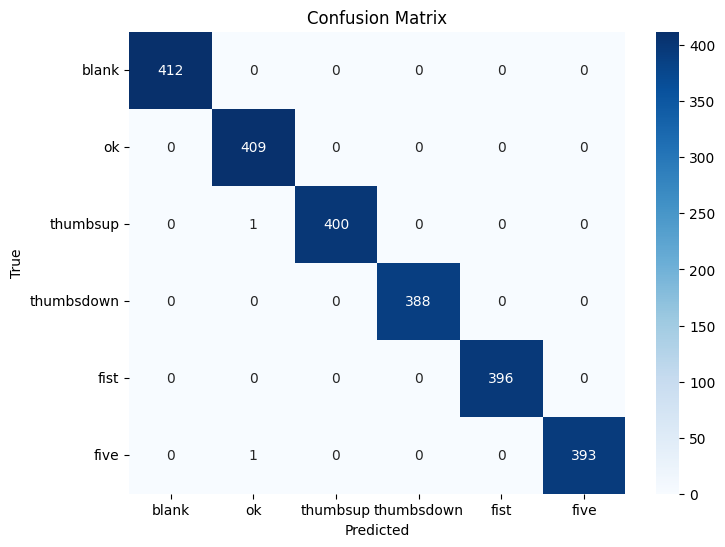

In [2]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train a Random Forest or SVM model
def train_model(model_type="RF"):
    # Load data
    X, y = load_images()
    
    # Extract features using HOG
    X_hog = extract_hog_features(X)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_hog, np.argmax(y, axis=1), test_size=0.25, random_state=42)
    
    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Select model type
    if model_type == "RF":
        model = RandomForestClassifier(n_estimators=100, random_state=42)
    elif model_type == "SVM":
        model = SVC(kernel='linear', random_state=42)
    else:
        raise ValueError("Unsupported model type. Use 'RF' for Random Forest or 'SVM' for Support Vector Machine.")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['blank', 'ok', 'thumbsup', 'thumbsdown', 'fist', 'five'], yticklabels=['blank', 'ok', 'thumbsup', 'thumbsdown', 'fist', 'five'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    # Save the model
    if model_type == "RF":
        import joblib
        joblib.dump(model, "hand_gesture_rf_model.pkl")
    else:
        import joblib
        joblib.dump(model, "hand_gesture_svm_model.pkl")

if __name__ == "__main__":
    # Choose either 'RF' for Random Forest or 'SVM' for Support Vector Machine
    train_model(model_type="RF")  # or train_model(model_type="SVM")
